In [1]:
import numpy as np
import pyvox.parser
import pyvox.writer
import pyvox.models
import json


In [2]:
%matplotlib inline

In [3]:
#vox = pyvox.parser.VoxParser('fake_vox/v1_test_1.vox').parse()
vox = pyvox.parser.VoxParser('data/AL_03A.vox').parse()
matrix_vox = vox.to_dense()
print(matrix_vox.shape)

(64, 64, 17)


In [4]:
matrix_vox

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
matrix_vox[matrix_vox==1]

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [6]:
np.unique(matrix_vox)

array([0, 1], dtype=uint8)

In [12]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 19.3 MB/s eta 0:00:0000:0100:01


In [13]:
from utils import visualizacion

In [14]:
import matplotlib.pyplot as plt

In [ ]:
pip install pyg-lib torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cu117.html

Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu117.html


In [19]:
import torch_geometric

/home/pablo/miniconda3/envs/huesos/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


OSError: libc10_cuda.so: cannot open shared object file: No such file or directory

In [ ]:
matrix_vox

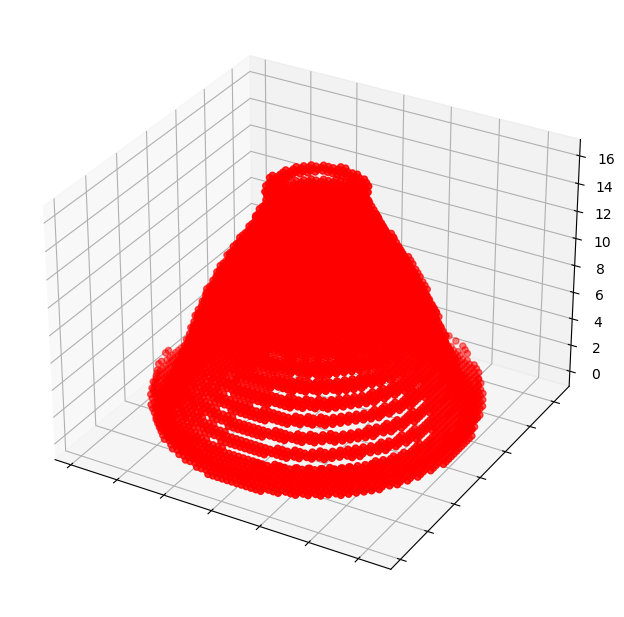

In [15]:
for i in np.unique(matrix_vox)[1:]:
    part = matrix_vox.copy()
    part[part!=i] = 0
    visualizacion.show_voxels(part)

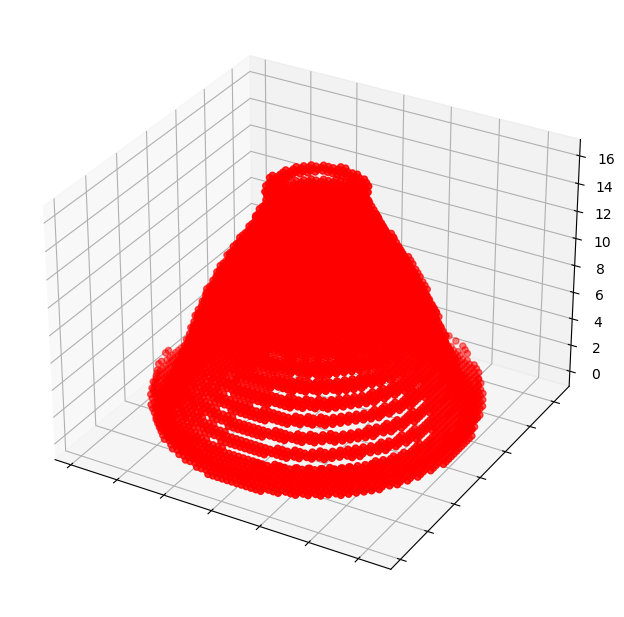

In [16]:
visualizacion.show_voxels(matrix_vox)

[ 1  1  1 ... 62 62 62] [28 29 30 ... 33 34 35] [1 1 1 ... 1 1 1]


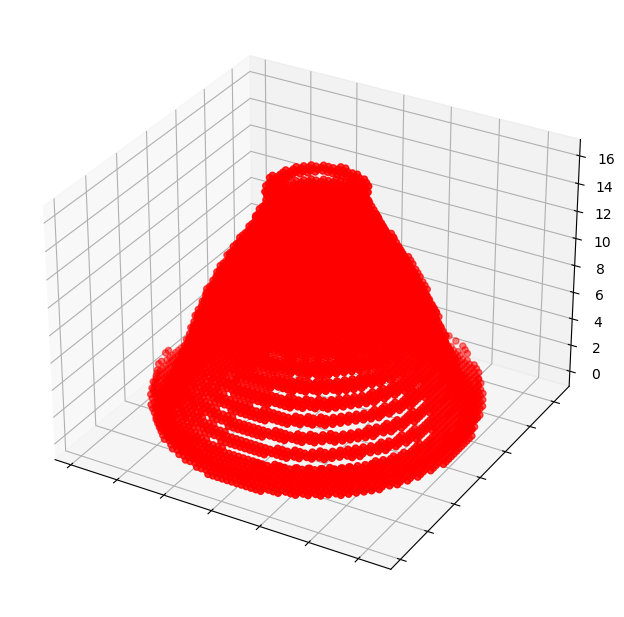

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

voxels = np.expand_dims(matrix_vox, 0)
colors_dict = {0:'black', 1:'red', 2:'red', 3:'blue', 4:'green', 5:'yellow', 6:'purple'}
fig = plt.figure(figsize=(32, 16))
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.05, hspace=0.05)
for i, sample in enumerate(voxels):
    color = []
    sample = np.array(sample)
    x, y, z = sample.nonzero()
    ax = plt.subplot(gs[i], projection='3d')
    print(x,y,z)
    for i in range(x.shape[0]):
        color.append(sample[x[i]][y[i]][z[i]])
    ax.scatter(x, y, z, zdir='z', c=[colors_dict[c] for c in color])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('auto')